In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer
from astropy.coordinates import SkyCoord
import numpy as np
import astropy.units as u

from astropy.coordinates import EarthLocation

plt.style.use('dark_background')

# we might want to do these color settings more manually
# https://stackoverflow.com/questions/1982770/changing-the-color-of-an-axis

In [10]:
# EarthLocation.get_site_names()

In [11]:
# observer = Observer.at_site('Cerro Pachon')
observer = Observer.at_site('Apache Point')
# observe_time = Time(['2025-03-15 19:30:00'])
observe_time = Time.now()

In [12]:
tbl = Table.read('I_239_hip_main.dat.fits')

In [13]:
# tbl.colnames

In [14]:
OK = tbl['Vmag'] < 6
# FixedTarget
cc = SkyCoord(ra=tbl['RAdeg'], dec=tbl['DEdeg'])
ft = FixedTarget(cc[OK])

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='polar')

# st = {'color': 'k', 'marker':'.', 's':1}
# plot_sky(ft, observer, observe_time, style_kwargs=st,ax=ax)
# _ = ax.set_thetagrids(range(0,360,5), np.repeat(' ', len(range(0,360,5))))

In [15]:
l=np.arange(0, 360, 0.1)*u.deg
b=np.repeat(0,len(l))*u.deg
lb = SkyCoord(l=l, b=b, frame="galactic")

# lb_radec = lb.icrs

lb_ft = FixedTarget(lb)

# fig = plt.figure()
# ax = fig.add_subplot(projection='polar')

# lb_st = {'color': 'C0', 'alpha':1}

# plot_sky(lb_ft, observer, observe_time, style_kwargs=lb_st, ax=ax)

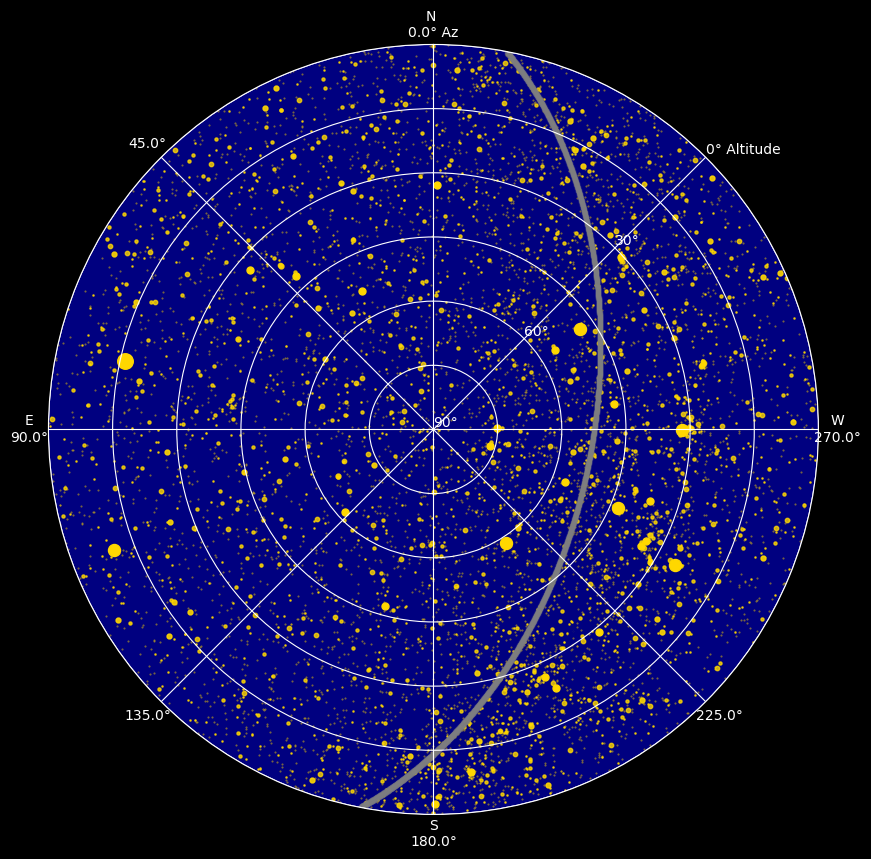

In [17]:
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(projection='polar')

OK = tbl['Vmag'] < 6
# FixedTarget
cc = SkyCoord(ra=tbl['RAdeg'], dec=tbl['DEdeg'])
sizes = [500,300,100,50, 40, 20, 3, 1, 0.1]
alphs = [1,1,1,.9, .8,.8,.8,.5,.4,.3,.2]
for k in range(-1,8):
    OK = (tbl['Vmag'] > (k-1)) & (tbl['Vmag'] <= k)

    ft = FixedTarget(cc[OK])
    st = {'color': 'gold', 'marker':'.', 's':sizes[k], 'alpha':alphs[k]}
    # print(np.sqrt(100/(k+2)))
    ax = plot_sky(ft, observer, observe_time, style_kwargs=st)

lb_ft = FixedTarget(lb)
lb_st = {'color': 'gray',  's':10, 'alpha':0.25, 'marker':'s'}

plot_sky(lb_ft, observer, observe_time, style_kwargs=lb_st,ax=ax)  
r_labels = ['90'+u'\N{DEGREE SIGN}', ' ' , '60'u'\N{DEGREE SIGN}', ' ', 
            '30'+u'\N{DEGREE SIGN}', ' ' , '0'+u'\N{DEGREE SIGN} Altitude']
_ = ax.set_rgrids(range(1, 106, 15), r_labels, angle=-45)
# _ = ax.set_thetagrids(range(0, 360, 45), np.repeat(' ', len(range(0,360,45))))

ax.set_facecolor("Navy")


plt.savefig('example.png', dpi=300, bbox_inches='tight')